In [2]:
# import necessary files

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [5]:
PATH = 'videorecommender.csv'
df = pd.read_csv(PATH)

In [6]:
df.head()

,Like,Share,Download,Bookmark,Comment,Follow,Recommend
0,1,1,1,1,1,1,1
1,1,0,1,1,0,1,1
2,1,1,0,0,0,1,1
3,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0


In [7]:
df.tail()

,Like,Share,Download,Bookmark,Comment,Follow,Recommend
4,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0
6,1,0,0,0,0,1,1
7,0,0,0,0,1,0,0
8,1,0,0,0,1,0,1


In [8]:
df.size

63

In [9]:
df.shape

(9, 7)

In [10]:
df.columns

Index(['Like', 'Share', 'Download', 'Bookmark', 'Comment', 'Follow',
       'Recommend'],
      dtype='object')

In [12]:
df['Recommend'].unique()

array([1, 0], dtype=int64)

In [15]:
df.dtypes

Like         int64
Share        int64
Download     int64
Bookmark     int64
Comment      int64
Follow       int64
Recommend    int64
dtype: object

In [16]:
df['Recommend'].value_counts()

1    5
0    4
Name: Recommend, dtype: int64

<AxesSubplot: >

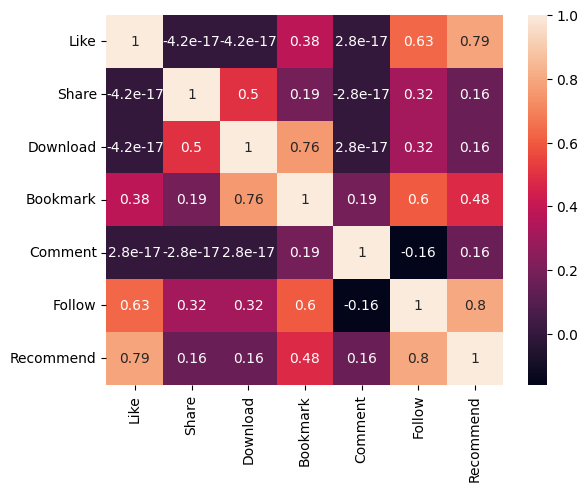

In [17]:
# heatmap
sns.heatmap(df.corr(),annot=True)

In [19]:
# profiling
# Import libraries
import pandas as pd
from ydata_profiling import ProfileReport


# Produce and save the profiling report
profile = ProfileReport(df,title="HCC Profile Report")
profile.to_file("profile report.html")

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 125.07it/s]


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# dt['Hobby']= label_encoder.fit_transform(data['Hobby'])
# data['Interest']= label_encoder.fit_transform(data['Interest'])


In [24]:
features=pd.DataFrame(df.iloc[:,0:6])

In [25]:
features

,Like,Share,Download,Bookmark,Comment,Follow
0,1,1,1,1,1,1
1,1,0,1,1,0,1
2,1,1,0,0,0,1
3,0,1,1,0,0,0
4,0,0,0,0,0,0
5,1,0,0,0,0,0
6,1,0,0,0,0,1
7,0,0,0,0,1,0
8,1,0,0,0,1,0


In [26]:
target=df['Recommend']

In [27]:
target

0    1
1    1
2    1
3    0
4    0
5    0
6    1
7    0
8    1
Name: Recommend, dtype: int64

In [28]:
target.shape

(9,)

In [29]:
features.shape

(9, 6)

In [30]:
acc=[]
model=[]

In [32]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [33]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [34]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([1. , 1. , 0.5, 0.5, 0. ])

In [35]:
# saving the model
import pickle
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

In [36]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [37]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.5, 1. , 0.5, 1. , 0. ])

In [38]:
import pickle
NB_pkl_filename = 'NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

In [39]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [40]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.5, 0.5, 0.5, 0.5, 0. ])

In [41]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [42]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([1. , 1. , 0.5, 1. , 0. ])

In [43]:
import pickle
LR_pkl_filename = 'LogisticRegression.pkl'
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
LR_Model_pkl.close()

In [44]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [45]:
score = cross_val_score(RF,features,target,cv=5)
score

array([1., 1., 1., 1., 0.])

In [46]:
import pickle
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()

In [47]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

ModuleNotFoundError: No module named 'xgboost'

In [48]:
score = cross_val_score(XB,features,target,cv=5)
score

NameError: name 'XB' is not defined

In [49]:
import pickle
XB_pkl_filename = 'XGBoost.pkl'
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
XB_Model_pkl.close()

NameError: name 'XB' is not defined

<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

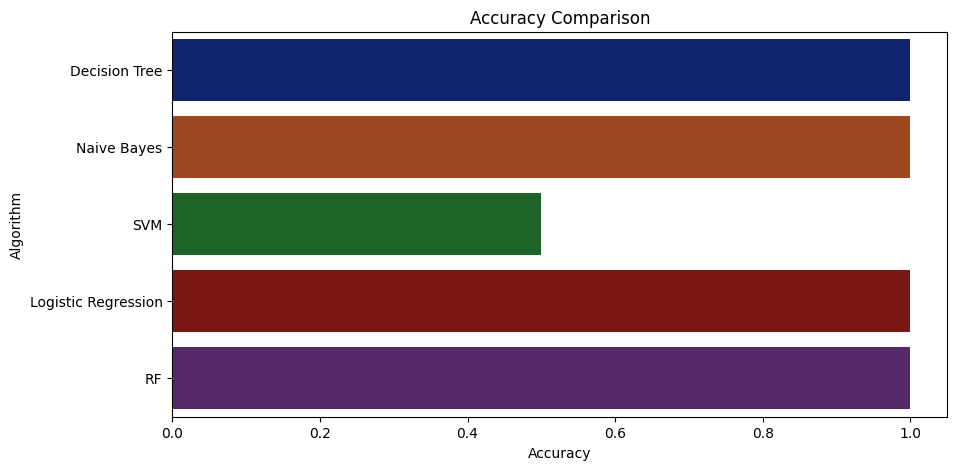

In [50]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [51]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 1.0
Naive Bayes --> 1.0
SVM --> 0.5
Logistic Regression --> 1.0
RF --> 1.0


In [58]:
data = np.array([[0,1, 1, 1, 1,0]])
prediction = DecisionTree.predict(data)
# print(prediction)
if prediction==1:
    print("recommend")
else:
    print("Don't recommend")

Don't recommend
